# Downloading of dataset from Kaggle

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soheiltehranipour","key":"ec6149a70b5ccf71fcb9061193bdcd92"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 73 Mar 12 13:39 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 84.4MB/s]
 95% 258M/271M [00:03<00:00, 86.4MB/s]
100% 271M/271M [00:03<00:00, 72.5MB/s]
 99% 539M/543M [00:05<00:00, 112MB/s]
100% 543M/543M [00:05<00:00, 108MB/s]


In [7]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train.zip


In [8]:
from zipfile import ZipFile

file_name = "train.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [9]:
file_name = "test1.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [10]:
!ls

kaggle.json  sampleSubmission.csv  test1.zip  train.zip
sample_data  test1		   train


# Importing Libraries

In [11]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

!pip install np_utils

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
!pip install np_utils

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
from sklearn.utils import shuffle

In [17]:
!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Converting image's to vectors

In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test1/'

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [23]:
X_train, y_train = prep_data(train_images)
X_test, y_test = prep_data(test_images)

X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [24]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (25000, 64, 64, 3)
Test shape: (12500, 64, 64, 3)


In [0]:
X, y = shuffle(X_train, y_train)

In [26]:
X.shape

(25000, 64, 64, 3)

In [27]:
y.shape

(25000, 1)

# Splitting of dataset into train (60%), validation (20%) and test (20%)

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print("Train shape: {}".format(X_train.shape))
print("Train label shape: {}".format(y_train.shape))
print("Validation shape: {}".format(X_val.shape))
print("Validation label shape: {}".format(y_val.shape))

Train shape: (20000, 64, 64, 3)
Train label shape: (20000, 1)
Validation shape: (5000, 64, 64, 3)
Validation label shape: (5000, 1)


# Converting to one-hot vector representation

In [29]:
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(20000, 2)
2
(5000, 2)


# Visualizing the dataset

In [0]:
classes = {0: 'cats',
          1: 'dogs'}

In [0]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

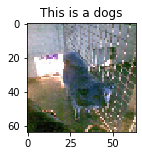

In [32]:
show_images(X_train, y_train, 0)

In [0]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255

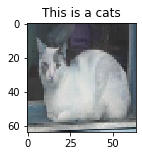

In [34]:
show_images(X_train_norm, y_train, 5)

# Final Choosen Model Architecture and Training of Model

For the details about how this architecture is choosen, scroll down to the last section on "How to choose the right model architecture iteratively?"

In [35]:
model9 = Sequential()

model9.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))

model9.add(Conv2D(64, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(128, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(256, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model9.add(Flatten())
model9.add(Dropout(0.4))

model9.add(Dense(units=120, activation='relu'))
model9.add(Dense(units=2, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model9.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)      

In [37]:
model9.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=50, batch_size = 64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/50





20000/20000 [==============================] - 24s 1ms/step - loss: 0.6600 - acc: 0.5939 - val_loss: 0.6179 - val_acc: 0.6558
Epoch 2/50
20000/20000 [==============================] - 10s 524us/step - loss: 0.5803 - acc: 0.6951 - val_loss: 0.5084 - val_acc: 0.7548
Epoch 3/50
20000/20000 [==============================] - 10s 514us/step - loss: 0.5084 - acc: 0.7516 - val_loss: 0.5126 - val_acc: 0.7458
Epoch 4/50
20000/20000 [==============================] - 10s 518us/step - loss: 0.4583 - acc: 0.7837 - val_loss: 0.5468 - val_acc: 0.7270
Epoch 5/50
20000/20000 [==============================] - 10s 513us/step - loss: 0.4247 - acc: 0.8063 - val_loss: 0.3897 - val_acc: 0.8280
Epoch 6/50
20000/20000 [==============================] - 10s 515us/step - loss: 0.3899 - acc: 0.8261 - val_loss: 0.3878 - val_acc: 0.8346
Epoch 7/50
20000/

# Making Predictions using the model on Training and Test data

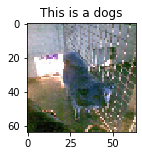

Our Model Prediction: [0]


In [38]:
image = X_train[0]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,0)

print("Our Model Prediction: {}".format(test_pred))

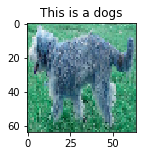

Our Model Prediction: [1]


In [39]:
image = X_train[100]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,100)

print("Our Model Prediction: {}".format(test_pred))

In [0]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,64,64,3)
  image_class = classes[model.predict_classes(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

In [41]:
X_test, test_idx = prep_data(test_images)

X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


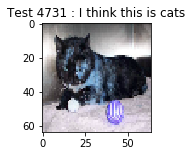

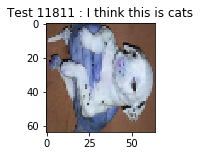

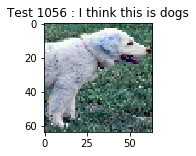

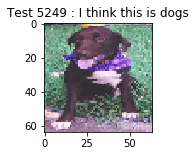

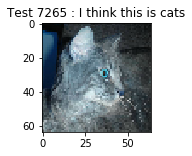

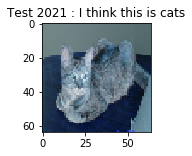

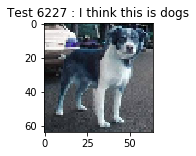

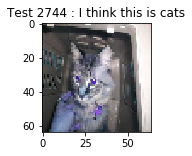

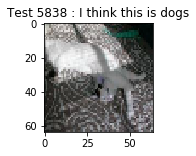

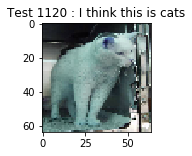

In [42]:
X_test_lr, test_idx = X_test, test_idx

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, model9)

# How to choose the right model architecture iteratively?

Choosing the right architecture and the correct set of hyperparameter is an art of Deep Learning that's very important to master for any data scientist.

Here, I give you a quick guide on how you can choose the right architecture for your particular task and the correct set of hyperparameters iteratively.

**Model 1**

1. Build a simple and rought model quickly. It will not perform good but it will give you a good insight as to where you can improve in your architecture and set of hyperparameters.

In [43]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.6))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dropout(0.6))

model1.add(Dense(units=120, activation='relu'))
model1.add(Dense(units=2, activation='sigmoid'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)         

In [79]:
history1 = model1.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 7s 339us/step - loss: 0.6931 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5028
Epoch 2/20
20000/20000 [==============================] - 7s 338us/step - loss: 0.6931 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5028
Epoch 3/20
20000/20000 [==============================] - 7s 330us/step - loss: 0.6931 - acc: 0.4964 - val_loss: 0.6931 - val_acc: 0.5024
Epoch 4/20
20000/20000 [==============================] - 7s 331us/step - loss: 0.6931 - acc: 0.4967 - val_loss: 0.6931 - val_acc: 0.5024
Epoch 5/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.6931 - acc: 0.4973 - val_loss: 0.6931 - val_acc: 0.5006
Epoch 6/20
20000/20000 [==============================] - 7s 331us/step - loss: 0.6931 - acc: 0.4971 - val_loss: 0.6931 - val_acc: 0.5044
Epoch 7/20
20000/20000 [==============================] - 7s 336us/step - loss: 0.6931 - acc: 0.4975 - val_loss: 0.6931 - v

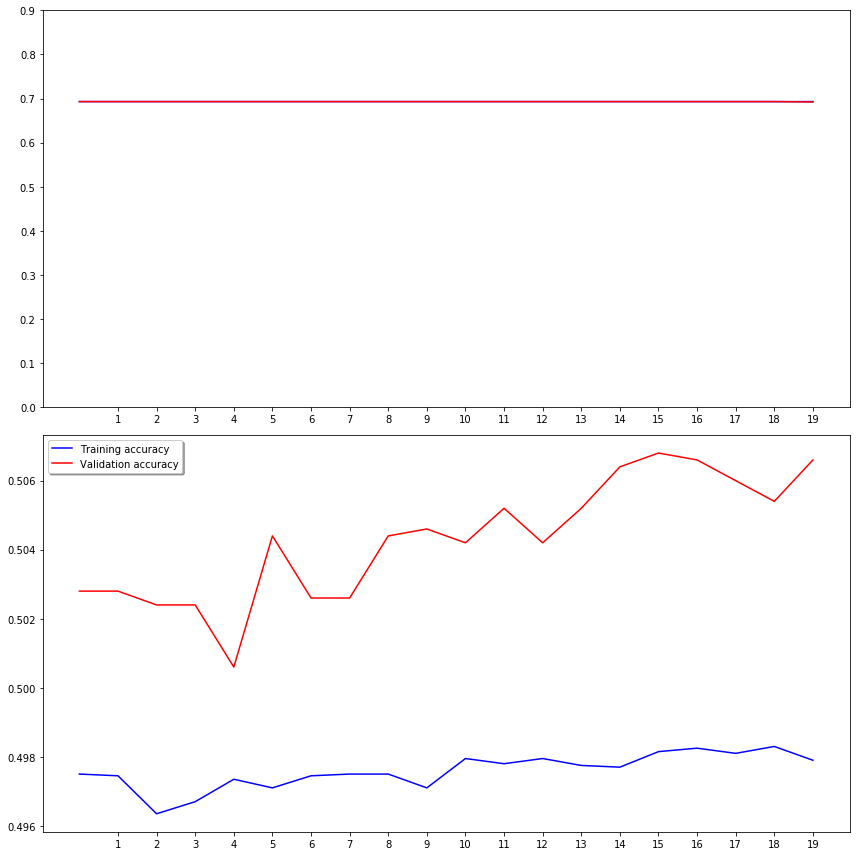

In [83]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
y_pred1 = model1.predict(X_test)

In [73]:
X_train.shape

(20000, 64, 64, 3)

In [74]:
X_test.shape

(12500, 64, 64, 3)

In [76]:
y_test.shape

(12500, 1)

As you can see our model is showing a training accruacy of 84.84 % on training data that can be increased. However, our model right now has only 96650 trainable parameters. We can make our model more deeper to make our training accuracy even better.

**Model 2**

In [0]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
#model2.add(Dropout(0.6))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(256, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Flatten())
#model2.add(Dropout(0.6))

model2.add(Dense(units=120, activation='relu'))
model2.add(Dense(units=2, activation='sigmoid'))

In [48]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 256)        

In [49]:
model2.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 10s 487us/step - loss: 0.6572 - acc: 0.6030 - val_loss: 0.6011 - val_acc: 0.6862
Epoch 2/20
20000/20000 [==============================] - 9s 453us/step - loss: 0.5547 - acc: 0.7155 - val_loss: 0.5083 - val_acc: 0.7536
Epoch 3/20
20000/20000 [==============================] - 9s 453us/step - loss: 0.4775 - acc: 0.7710 - val_loss: 0.4644 - val_acc: 0.7794
Epoch 4/20
20000/20000 [==============================] - 9s 454us/step - loss: 0.4074 - acc: 0.8132 - val_loss: 0.4286 - val_acc: 0.8112
Epoch 5/20
20000/20000 [==============================] - 9s 450us/step - loss: 0.3494 - acc: 0.8465 - val_loss: 0.3922 - val_acc: 0.8288
Epoch 6/20
20000/20000 [==============================] - 9s 455us/step - loss: 0.2878 - acc: 0.8771 - val_loss: 0.3648 - val_acc: 0.8342
Epoch 7/20
20000/20000 [==============================] - 9s 452us/step - loss: 0.2410 - acc: 0.8968 - val_loss: 0.3554 - 

We can clearly see that making our model deeper do help with the training accuracy as now our Training Accuracy has increased to 98.88% but our validation accuracy is only 84.56%. This means our model is overfitting. We can add regularization techniques like dropout to improve our validation set performance and prevent overfitting of our model.

**Model 3**

In [0]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(256, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Flatten())
model3.add(Dropout(0.3))

model3.add(Dense(units=120, activation='relu'))
model3.add(Dense(units=2, activation='sigmoid'))

In [51]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 128)        

In [52]:
model3.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 10s 504us/step - loss: 0.6744 - acc: 0.5609 - val_loss: 0.6478 - val_acc: 0.6148
Epoch 2/20
20000/20000 [==============================] - 9s 471us/step - loss: 0.5777 - acc: 0.6946 - val_loss: 0.5197 - val_acc: 0.7466
Epoch 3/20
20000/20000 [==============================] - 10s 475us/step - loss: 0.4896 - acc: 0.7656 - val_loss: 0.4488 - val_acc: 0.8024
Epoch 4/20
20000/20000 [==============================] - 9s 471us/step - loss: 0.4146 - acc: 0.8101 - val_loss: 0.4184 - val_acc: 0.8076
Epoch 5/20
20000/20000 [==============================] - 9s 471us/step - loss: 0.3674 - acc: 0.8377 - val_loss: 0.3634 - val_acc: 0.8404
Epoch 6/20
20000/20000 [==============================] - 9s 473us/step - loss: 0.3313 - acc: 0.8539 - val_loss: 0.3535 - val_acc: 0.8400
Epoch 7/20
20000/20000 [==============================] - 9s 473us/step - loss: 0.3044 - acc: 0.8681 - val_loss: 0.3276 -

After applying Dropout as our regularization technique, the amount of overfitting has certainly reduced but our model training accuracy has considerably reduced to 94.40%. This means that if we further increase the dropout for further reducing the overfitting, our training accuracy will decrease drastically. So, we need to increase the trainable parameters more. That means, either we can make our network more deep or remove the MaxPooling2D layer just before the flatten(). We take the 2nd approach. But both approaches can be checked. Moreover, we add the dropout as well so that our model do not overfit.

Model 4

In [0]:
model4 = Sequential()

model4.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Conv2D(64, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(128, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(256, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Flatten())
model4.add(Dropout(0.4))

model4.add(Dense(units=120, activation='relu'))
model4.add(Dense(units=2, activation='sigmoid'))

In [57]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 128)        

In [58]:
model4.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 12s 595us/step - loss: 0.6703 - acc: 0.5800 - val_loss: 0.6497 - val_acc: 0.6230
Epoch 2/20
20000/20000 [==============================] - 11s 526us/step - loss: 0.5834 - acc: 0.6905 - val_loss: 0.5087 - val_acc: 0.7522
Epoch 3/20
20000/20000 [==============================] - 10s 522us/step - loss: 0.5193 - acc: 0.7443 - val_loss: 0.4816 - val_acc: 0.7780
Epoch 4/20
20000/20000 [==============================] - 10s 519us/step - loss: 0.4654 - acc: 0.7799 - val_loss: 0.4342 - val_acc: 0.7994
Epoch 5/20
20000/20000 [==============================] - 10s 520us/step - loss: 0.4378 - acc: 0.7969 - val_loss: 0.5210 - val_acc: 0.7340
Epoch 6/20
20000/20000 [==============================] - 10s 520us/step - loss: 0.4049 - acc: 0.8170 - val_loss: 0.4108 - val_acc: 0.8102
Epoch 7/20
20000/20000 [==============================] - 11s 526us/step - loss: 0.3817 - acc: 0.8291 - val_loss: 0.3

This model gives the best accuracy. So we trained it for 50 epochs and the result for which is shown in the "Final Choosen Model Architecture and Training of Model" section.

You can further twerk the hyperparameter and the model architecture to get even better accuracy. However, I will leave you here.

Wish You A Happy Exploring!!

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model9.save('model9.h5')
model9_file = drive.CreateFile({'title' : 'model9.h5'})                       
model9_file.SetContentFile('model9.h5')                       
model9_file.Upload()

In [0]:
model1.save('model1.h5')
model1_file = drive.CreateFile({'title' : 'model1.h5'})                       
model1_file.SetContentFile('model1.h5')                       
model1_file.Upload()

In [0]:
model2.save('model2.h5')
model2_file = drive.CreateFile({'title' : 'model2.h5'})                       
model2_file.SetContentFile('model2.h5')                       
model2_file.Upload()

In [0]:
model3.save('model3.h5')
model3_file = drive.CreateFile({'title' : 'model3.h5'})                       
model3_file.SetContentFile('model3.h5')                       
model3_file.Upload()

In [0]:
model4.save('model4.h5')
model4_file = drive.CreateFile({'title' : 'model4.h5'})                       
model4_file.SetContentFile('model4.h5')                       
model4_file.Upload()